In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.patches as mpatches

from itertools import izip

In [12]:
wd = '/home/bay001/projects/tbos_clipseq_20160809/analysis/v3_8-15-2016'
bedhead = ['chrom','start','end','l10pval','l2fc','strand','ann','gene']
regions = ['3utr','5utr','CDS','5utr_and_3utr','intron','noncoding_exon','noncoding_intron','intergenic']
suffix = '.peaks.l2inputnormnew.bed.compressed.bed.annotated'

FOLD_CHANGE_CUTOFF = 3
PVALUE_CUTOFF = 5

In [15]:
import re
def get_counts(wd):
    samples = {}
    for f in glob.glob(os.path.join(wd,'*.annotated')):
        df = pd.read_table(f,names=bedhead)
        df = df[(df['l10pval'] > PVALUE_CUTOFF) & (df['l2fc'] > FOLD_CHANGE_CUTOFF)]
        basename = f.replace(wd+'/','').replace(suffix,'')
        basename = re.sub(r'\.basedon_\w+','',basename)
        samples[basename] = {}
        df['region'] = df.apply(return_region,axis=1)
        for key,value in df['region'].value_counts().iteritems():
            samples[basename][key] = value
        for region in regions:
            if region not in samples[basename]:
                samples[basename][region] = 0
    return samples
def return_region(row):
    region = row['ann'].split('|')[0]
    
    return region

In [336]:
# take out intergenic and 3_and_5prime annotations per discussion 8-25-2016
samples = get_counts(wd)
df = pd.DataFrame(samples)
df.drop('5utr_and_3utr',inplace=True)
df.drop('intergenic',inplace=True)
df = df.T
df.head()

,3utr,5utr,CDS,intron,noncoding_exon,noncoding_intron
A11_01_01,1314,156,1562,231,82,62
A11_02_01,1088,263,1247,234,90,72
A1_01_01,2821,42,34,1592,140,62
A1_02_01,3177,45,36,1757,138,65
A2_01_01,41,31,11,119,9,2


([<matplotlib.axis.XTick at 0x2afff455b610>,
 <a list of 5 Text xticklabel objects>)

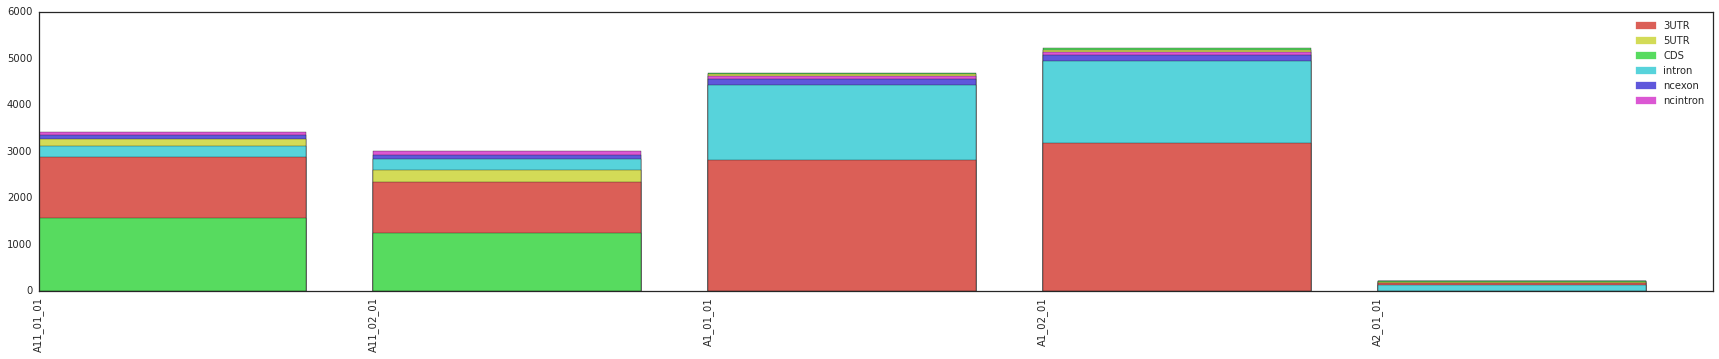

In [412]:
df = df.head(5)
s = sns.color_palette("hls", 6)
col = {'3utr':s[0],'5utr':s[1],'CDS':s[2],'intron':s[3],'noncoding_exon':s[4],'noncoding_intron':s[5]}
plt.figure(figsize=(30,5))
utr3 = mpatches.Patch(color=s[0], label='3UTR')
utr5 = mpatches.Patch(color=s[1], label='5UTR')
cds = mpatches.Patch(color=s[2], label='CDS')
intron = mpatches.Patch(color=s[3], label='intron')
ncexon = mpatches.Patch(color=s[4], label='ncexon')
ncintron = mpatches.Patch(color=s[5], label='ncintron')
ax = fig.add_subplot(1, 1, 1, frameon=False)
plt.legend(handles=[utr3,utr5,cds,intron,ncexon,ncintron])
for x in range(0,len(df.index)):
    offset = df.ix[x].sum()
    for splicetype in (df.ix[x].sort_values().index):
        offset = offset - df.ix[x][splicetype]
        plt.bar(x,offset+df.ix[x][splicetype],color=col[splicetype])

plt.xticks(range(0,len(df.index), 1), df.index, rotation=90,)


In [407]:
dx.index

Index([u'A11_01_01', u'A11_02_01', u'A1_01_01', u'A1_02_01'], dtype='object')

In [324]:
# this is just messing around with a maps function, but i'm too lazy to make a new notebook :) 
df2 = df.head(4)
df2.columns = range(0,6)
df2

,0,1,2,3,4,5
A11_01_01,1314,156,1562,231,82,62
A11_02_01,1088,263,1247,234,90,72
A1_01_01,2821,42,34,1592,140,62
A1_02_01,3177,45,36,1757,138,65


In [325]:

def lowsum(row):
    summed = 0
    for col, value in row.iteritems():
        if (value < 100):
            summed = summed + value
    return summed

df3 = df2.apply(lowsum,axis=1)
df3.rename('lowsum',inplace=True)
df2 = df2.where(df2 > 300, other=0)
dx = pd.concat([df3,df2],axis=1)
dx

,lowsum,0,1,2,3,4,5
A11_01_01,144,1314,0,1562,0,0,0
A11_02_01,162,1088,0,1247,0,0,0
A1_01_01,138,2821,0,0,1592,0,0
A1_02_01,146,3177,0,0,1757,0,0


In [326]:
colordict = {}
i = 0
for col in dx.columns:
    colordict[col] = sns.color_palette("hls",7)[i]
    i = i + 1

In [309]:
colordict

{0: (0.86, 0.8169142857142857, 0.33999999999999997),
 1: (0.45737142857142832, 0.86, 0.33999999999999997),
 2: (0.33999999999999997, 0.86, 0.66834285714285713),
 3: (0.33999999999999997, 0.60594285714285712, 0.86),
 4: (0.51977142857142811, 0.33999999999999997, 0.86),
 5: (0.86, 0.33999999999999997, 0.7545142857142858),
 'lowsum': (0.86, 0.37119999999999997, 0.33999999999999997)}

In [333]:
plt.figure(figsize=(20,10))


In [331]:
dx.ix[idx]

,lowsum,0,1,2,3,4,5
A1_02_01,146,3177,0,0,1757,0,0
A1_01_01,138,2821,0,0,1592,0,0
A11_01_01,144,1314,0,1562,0,0,0
A11_02_01,162,1088,0,1247,0,0,0
